In [1]:
from pyDOE import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pickle
import pandas as pd


In [2]:
def loguniform(low=-3, high=3, size=None):
    return (10)**(np.random.uniform(low, high, size))
def uniform(low=-3, high=3, size=None):
    return np.random.uniform(low,high, size)

# Random Sampling from loguniform distribution

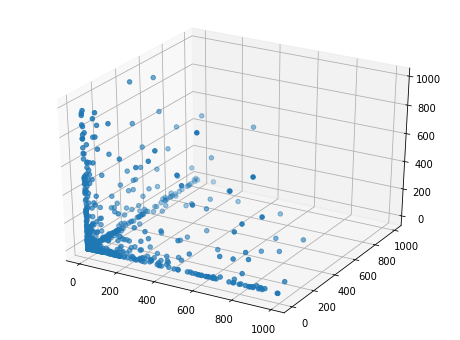

In [3]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(loguniform(size=1000),loguniform(size=1000),loguniform(size=1000))

<BarContainer object of 1000 artists>

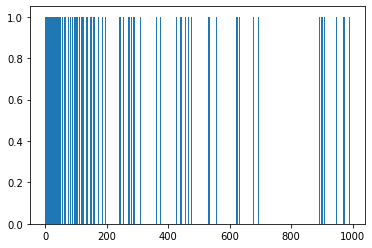

In [4]:
plt.bar(loguniform(size=1000),1)

# Latin hypercube sampling from loguniform distribution

In [5]:
data = np.column_stack((loguniform(size=100000),loguniform(size=100000),loguniform(size=100000)))


def lhs(data,nsample):
    m,nvar = data.shape
    ran=np.random.uniform(size=(nsample,nvar))
    s=np.zeros((nsample,nvar))
    for j in range(0,nvar):
        idx=np.random.permutation(nsample)+1
        P=((idx-ran[:,j])/nsample)*100
        s[:,j]= np.percentile(data[:,j],P)
    return s
        
points = lhs(data,1000)
print(points)


[[3.19412749e+02 2.59037599e-01 1.08178719e-01]
 [2.37640242e+02 3.16720170e-01 9.57111909e+00]
 [3.58118686e+02 6.66156325e+01 1.16946831e+02]
 ...
 [3.01689740e-01 9.42350340e+01 2.32844819e+00]
 [5.18813767e-03 2.54282689e+01 1.79907823e+00]
 [9.40618724e+00 4.11726303e-01 1.33652761e-02]]


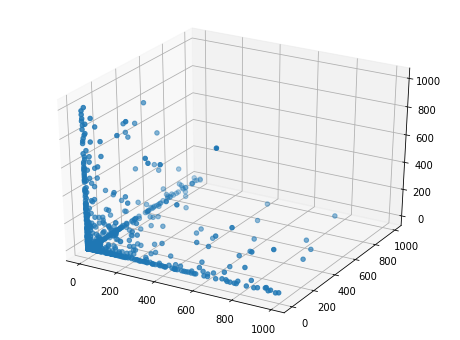

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2])

<BarContainer object of 1000 artists>

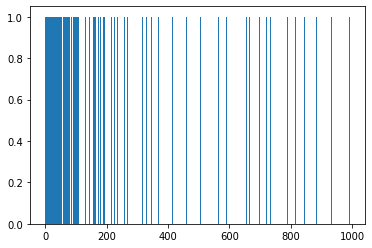

In [7]:
plt.bar(points[:,0],1)


#  Generating parameter distributions (Ranges)


In [8]:
loguniformdist = loguniform(size=1000000)


Create distribution with ranges

In [9]:
b_range = (0.01,1)
Vm_range = (10,1000)
km_range = (0.1,250)
mu_range = (0.001,50)

b_distribution = [x for x in loguniformdist if b_range[0] <= x <= b_range[1]]
Vm_distribution = [x for x in loguniformdist if Vm_range[0] <= x <= Vm_range[1]]
km_distribution = [x for x in loguniformdist if km_range[0] <= x <= km_range[1]]
mu_distribution = [x for x in loguniformdist if mu_range[0] <= x <= mu_range[1]]



lenghtsdistributions = (len(b_distribution), len(Vm_distribution), len(km_distribution), len(mu_distribution))
minimumlenghtdistribution = np.amin(lenghtsdistributions)
b_distribution=b_distribution[:minimumlenghtdistribution]
Vm_distribution=Vm_distribution[:minimumlenghtdistribution]
km_distribution=km_distribution[:minimumlenghtdistribution]
mu_distribution=mu_distribution[:minimumlenghtdistribution]



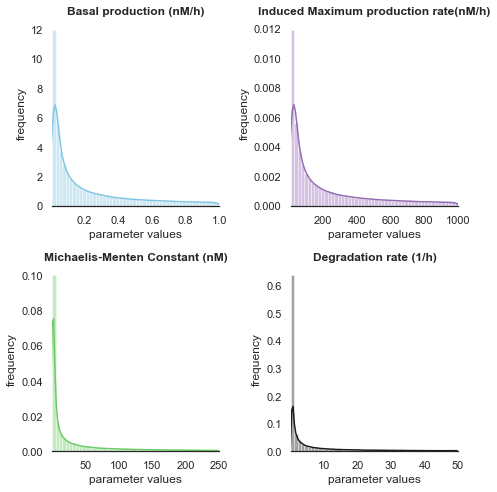

In [10]:
sns.set(style="white", palette="muted", color_codes=True)


fig,ax=plt.subplots(2,2,figsize=(7,7))
sns.despine(left=True)

sns.distplot(b_distribution, color="c", ax=ax[0, 0])
sns.distplot(Vm_distribution, color="m", ax=ax[0, 1])
sns.distplot(km_distribution, color="g", ax=ax[1, 0])
sns.distplot(mu_distribution, color="k", ax=ax[1, 1])

parameterclasstitle = ('Basal production (nM/h)', 'Induced Maximum production rate(nM/h)', 'Michaelis-Menten Constant (nM)', 'Degradation rate (1/h)')
parameterclass = (b_range,Vm_range,km_range,mu_range)
count=0
for ax in ax.flat:
    ax.set_title(parameterclasstitle[count], fontweight='bold')
    ax.set( xlabel = 'parameter values', ylabel='frequency')
    ax.set_xlim(parameterclass[count][0],int(parameterclass[count][1]))

    count+=1
    
fig.tight_layout()
# plt.savefig('thesisfigures/parameterdistributions')

Carry out LHS with defined ranges

In [11]:
datadistributions = np.column_stack((b_distribution,Vm_distribution, km_distribution))

datadistributions.shape
data = np.column_stack((loguniform(size=100000),loguniform(size=100000),loguniform(size=100000)))

print(data.shape,datadistributions.shape)



(100000, 3) (333215, 3)


In [12]:
points=lhs(datadistributions,10000)


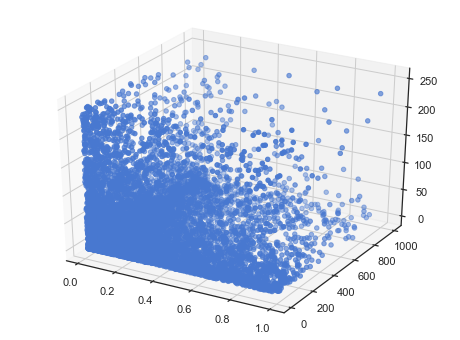

In [13]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2])

# Generating parameter combinations

In [14]:
#A general matrix is generated with the distributions for each parameter

b_matrix = np.column_stack((b_distribution,b_distribution,b_distribution,b_distribution,b_distribution,b_distribution))
Vm_matrix = np.column_stack((Vm_distribution,Vm_distribution,Vm_distribution,Vm_distribution,Vm_distribution,Vm_distribution))
mu_matrix = np.column_stack((mu_distribution,mu_distribution,mu_distribution))
km_matrix = np.column_stack((km_distribution,km_distribution,km_distribution,km_distribution,km_distribution,km_distribution,km_distribution))

par_distribution_matrix =np.concatenate((b_matrix,Vm_matrix,mu_matrix,km_matrix),1)


In [ ]:
numbercombinations = 1000000
points=lhs(par_distribution_matrix,numbercombinations)
points.shape
print(points)

In [25]:
cooperativity = np.full((numbercombinations, 1), 2)

######################################################################################################
#OLD PARAMETER SET WITH OLD DIFFUSION CONSTANTS (USED IN MRES)
# d_A = np.full((numbercombinations, 1), 0.789)
# d_A.shape
# d_B = np.full((numbercombinations, 1), 0.511)
######################################################################################################

d_A = np.full((numbercombinations, 1), 2.16)
d_A.shape
d_B = np.full((numbercombinations, 1), 0.81)
parameterindex = np.arange(1,numbercombinations+1, dtype=np.int).reshape(numbercombinations,1)
points = np.concatenate((parameterindex,points,d_A,d_B,cooperativity),1)

print(points)

[[1.00000000e+00 8.68679336e-02 9.71902589e-02 ... 2.16000000e+00
  8.10000000e-01 2.00000000e+00]
 [2.00000000e+00 1.14905606e-01 4.85107163e-01 ... 2.16000000e+00
  8.10000000e-01 2.00000000e+00]
 [3.00000000e+00 5.21369112e-02 1.58349161e-02 ... 2.16000000e+00
  8.10000000e-01 2.00000000e+00]
 ...
 [2.51000000e+02 6.07355236e-02 1.54263853e-01 ... 2.16000000e+00
  8.10000000e-01 2.00000000e+00]
 [2.52000000e+02 1.25081018e-01 1.00684424e-01 ... 2.16000000e+00
  8.10000000e-01 2.00000000e+00]
 [2.53000000e+02 2.04240952e-02 1.02945356e-01 ... 2.16000000e+00
  8.10000000e-01 2.00000000e+00]]


In [26]:
parameternames = ('index','ba','bb','bc','bd','be','bf','Va','Vb','Vc','Vd','Ve','Vf','mua','mub','mulva','kaa','kda','keb','kbd','kce','kfe','kee','d_A','d_B','n')
df = pd.DataFrame(data=points, columns = parameternames)
df['index'] = df['index'].astype(int)
df['n'] = df['n'].astype(int)
df = df.set_index('index')
df

,ba,bb,bc,bd,be,bf,Va,Vb,Vc,Vd,...,kaa,kda,keb,kbd,kce,kfe,kee,d_A,d_B,n
index,,,,,,,,,,,,,,,,,,,,,
1,0.086868,0.097190,0.036835,0.863921,0.146758,0.010618,456.708929,140.107838,199.928767,820.350622,...,0.688444,143.166891,3.305882,8.763996,2.389657,1.239518,12.726269,2.16,0.81,2
2,0.114906,0.485107,0.753556,0.030655,0.055482,0.057608,21.661934,222.681411,58.357536,44.019466,...,10.037881,78.462315,0.865757,0.701752,0.716615,4.040556,0.109762,2.16,0.81,2
3,0.052137,0.015835,0.882458,0.137561,0.710734,0.126790,280.531705,70.146707,240.273250,228.847782,...,2.023996,21.131164,18.899726,1.514466,6.490838,0.551011,24.256200,2.16,0.81,2
4,0.406767,0.128573,0.677499,0.767286,0.040198,0.045338,67.070169,144.272857,253.927922,108.655299,...,0.866012,1.190599,3.080222,60.555278,64.789695,0.193687,0.143494,2.16,0.81,2
5,0.097296,0.057748,0.050649,0.018245,0.025891,0.105874,15.073803,32.330321,15.187773,354.056131,...,1.441945,3.473627,2.495206,1.555057,52.046906,183.773592,20.634407,2.16,0.81,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.178455,0.822292,0.086345,0.371963,0.083677,0.983387,106.048116,312.306383,18.486902,71.644976,...,78.454899,0.428710,73.633550,0.833202,2.779533,0.163528,2.662391,2.16,0.81,2
250,0.160167,0.350895,0.182705,0.442032,0.120109,0.016390,219.708878,853.185166,159.439676,80.170674,...,13.978675,74.183301,0.266724,0.171226,218.795697,38.093091,0.850475,2.16,0.81,2
251,0.060736,0.154264,0.058595,0.604109,0.452162,0.656280,53.715283,39.653646,15.327525,712.302870,...,216.602306,2.256743,3.786130,2.501344,0.178735,0.140410,19.279081,2.16,0.81,2


In [37]:
df.to_pickle('results/parameterfiles/pandasparametertest253.pkl')

# Different sampling techniques

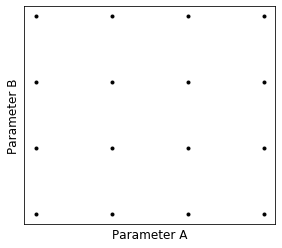

In [80]:
fig, axs = plt.subplots(figsize=(4.5,4))

xvalues = np.array([0, 1, 2, 3]);
yvalues = np.array([0, 1, 2, 3]);
xx, yy = np.meshgrid(xvalues, yvalues)

plt.plot(xx, yy, marker='.', color='k', linestyle='none')
plt.xticks([])
plt.yticks([])
plt.xlabel('Parameter A',fontsize = 12)
plt.ylabel('Parameter B', fontsize = 12)

plt.savefig('thesisfigures/gridsampling.png')


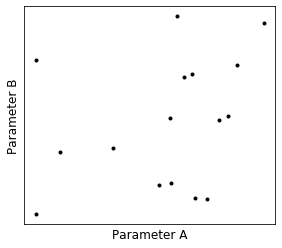

In [81]:
fig, axs = plt.subplots(figsize=(4.5,4))

n_points = 16
plt.plot(uniform(size=n_points),uniform(size=n_points),marker='.', color='k', linestyle='none')
plt.xticks([])
plt.yticks([])
plt.xlabel('Parameter A',fontsize = 12)
plt.ylabel('Parameter B', fontsize = 12)
plt.savefig('thesisfigures/randomsampling.png')



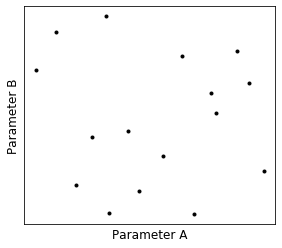

In [83]:
fig, axs = plt.subplots(figsize=(4.5,4))

data = np.column_stack((uniform(size=100000),uniform(size=100000)))
points = lhs(data,n_points)

plt.plot(points[:,0], points[:,1], marker='.', color='k', linestyle='none')
plt.xticks([])
plt.yticks([])
plt.xlabel('Parameter A',fontsize = 12)
plt.ylabel('Parameter B', fontsize = 12)
plt.savefig('thesisfigures/lhssampling.png')

